# 📌 Cellule 1 : Imports

In [25]:
import torch
from pathlib import Path
from src.data import get_dataloaders
from src.model import get_model

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np

# 📌 Cellule 2 : Charger les données

In [26]:
# Paramètres
data_dir = Path("../data/processed/OpenAnimalTracks_split")
batch_size = 32
img_size = (128, 128)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Chargement des data loaders
_, _, test_loader, class_names = get_dataloaders(data_dir, batch_size, img_size)

# 📌 Cellule 3 : Charger le modèle entraîné

In [27]:
model = get_model(num_classes=len(class_names))
model.load_state_dict(torch.load("../model.pth", map_location=device))
model.to(device)
model.eval()

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

# 📌 Cellule 4 : Faire les prédictions sur le test set

In [28]:
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.numpy())
        y_pred.extend(preds.cpu().numpy())

# 📌 Cellule 5 : Matrice de confusion

Matrice de confusion sauvegardée dans : ../outputs/confusion_matrix.png


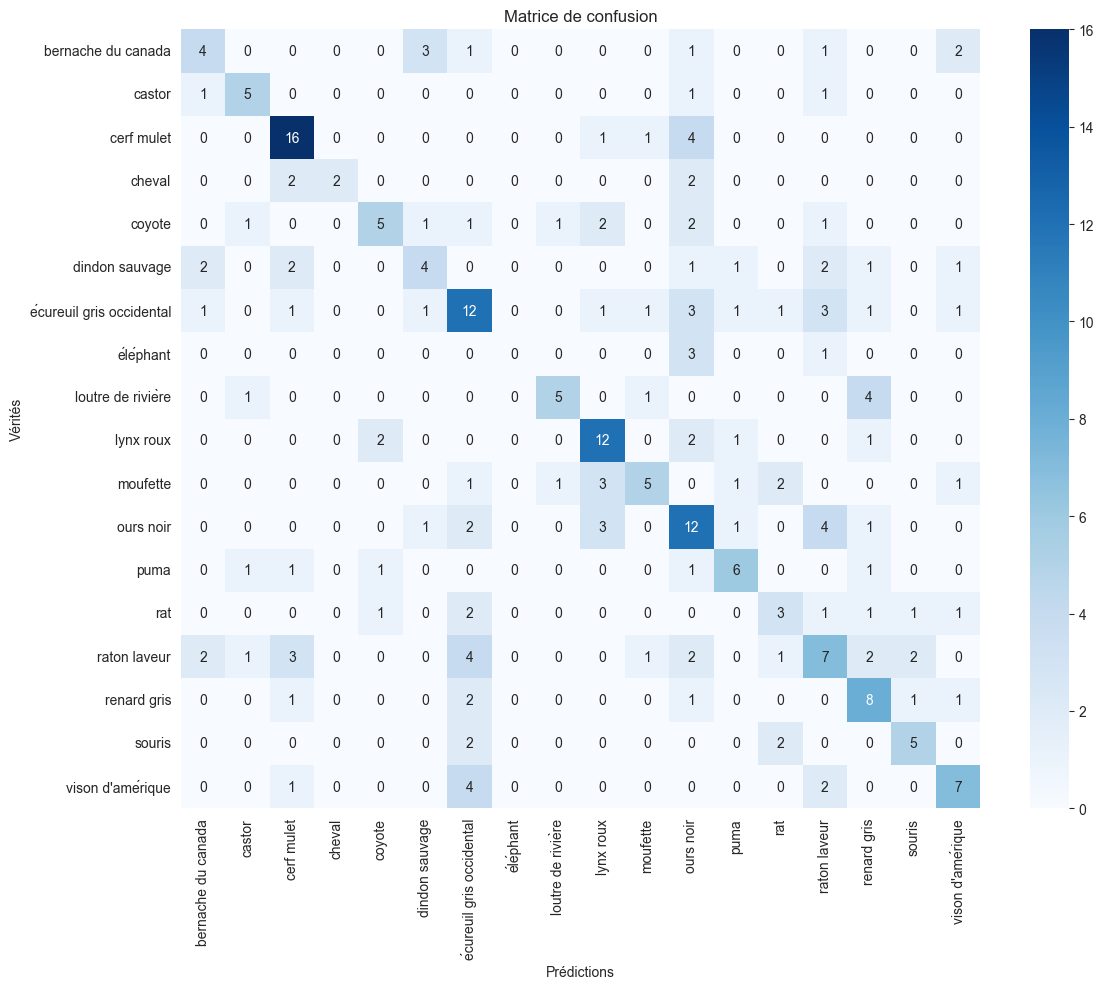

In [29]:
# Chemin du dossier de sortie
output_dir = Path("../outputs/")
output_dir.mkdir(parents=True, exist_ok=True)  # Crée le dossier si besoin

# Chemin du fichier image à enregistrer
conf_matrix_path = output_dir / "confusion_matrix.png"

# Réaffichage pour sauvegarde (nécessaire si plt.show() a été appelé)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Sauvegarde du graphique
plt.savefig(conf_matrix_path)

# Affichage de confirmation (optionnel)
print(f"Matrice de confusion sauvegardée dans : {conf_matrix_path}")

# 📌 Cellule 6 : Rapport de classification

NB: l'accuracy de l'éléphant est à 0 et n'a jamais été prédit par le modèle

In [33]:
from sklearn.metrics import classification_report, accuracy_score
import os

# Créer le dossier outputs s’il n’existe pas
os.makedirs("outputs", exist_ok=True)

# Générer le rapport de classification
report = classification_report(y_true, y_pred, target_names=class_names)

# Sauvegarder dans outputs/classification_report.txt
report_path = Path("../outputs/classification_report.txt")
with open(report_path, "w") as f:
    f.write("📋 Rapport de classification :\n\n")
    f.write(report)

# Affichage en console pour vérification
print(report)

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy globale : {accuracy:.2%}")

                           precision    recall  f1-score   support

       bernache du canada       0.40      0.33      0.36        12
                   castor       0.56      0.62      0.59         8
               cerf mulet       0.59      0.73      0.65        22
                   cheval       1.00      0.33      0.50         6
                   coyote       0.56      0.36      0.43        14
           dindon sauvage       0.40      0.29      0.33        14
écureuil gris occidental       0.39      0.44      0.41        27
               éléphant       0.00      0.00      0.00         4
       loutre de rivière       0.71      0.45      0.56        11
                lynx roux       0.55      0.67      0.60        18
                 moufette       0.56      0.36      0.43        14
                ours noir       0.34      0.50      0.41        24
                     puma       0.55      0.55      0.55        11
                      rat       0.33      0.30      0.32     

/Users/louisgardet/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/louisgardet/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/louisgardet/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

# 📌 Cellule 7 : Afficher quelques mauvaises prédictions

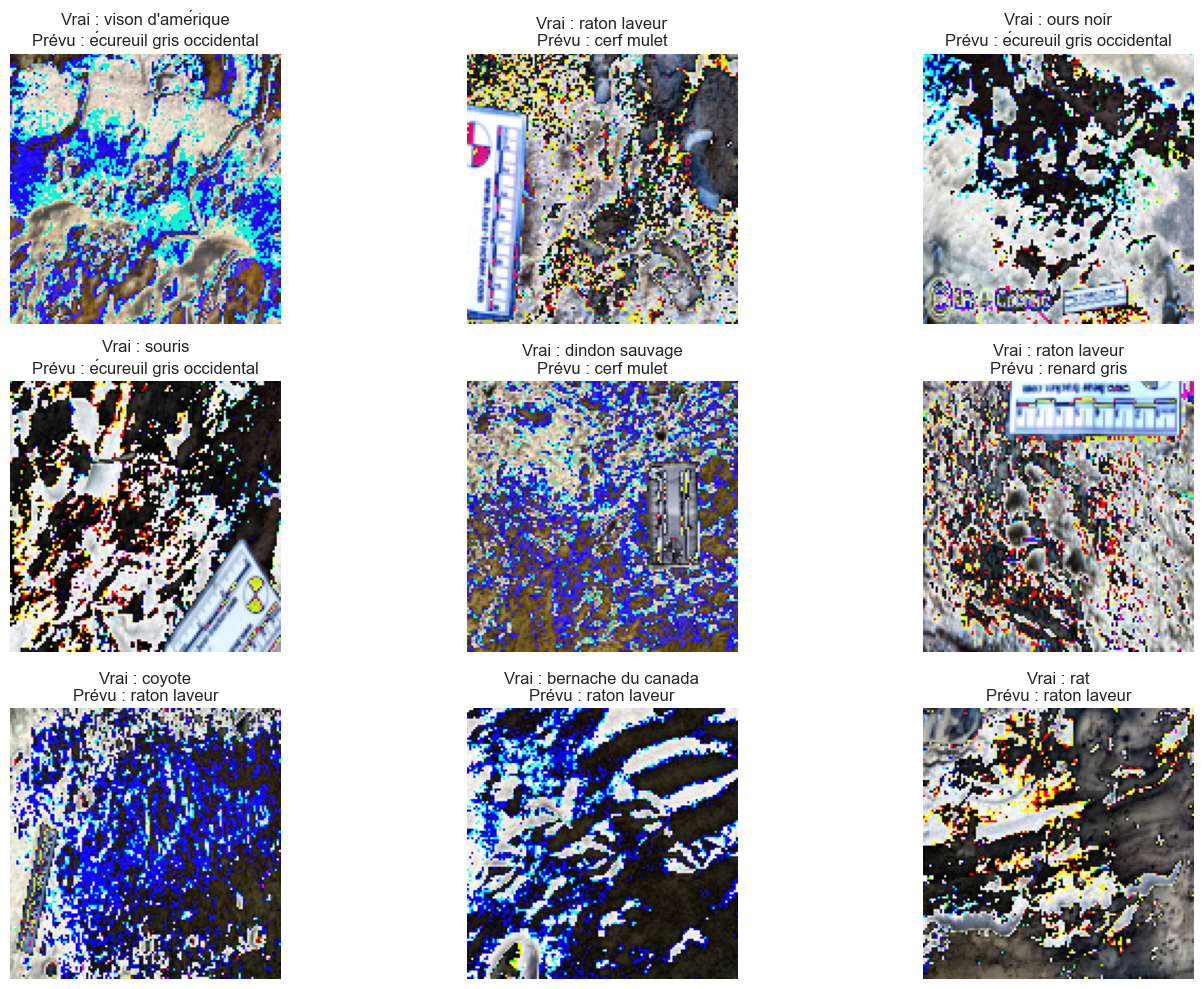

9 mauvaises prédictions sauvegardées dans : /Users/louisgardet/dev/python/ETL_Wildlens/outputs/wrong_predictions


In [32]:
import random
import torchvision.transforms.functional as TF
from pathlib import Path
from PIL import Image

# Dossier de sortie
output_dir = Path("../outputs/wrong_predictions")
output_dir.mkdir(parents=True, exist_ok=True)

# Fonction d'affichage et sauvegarde
def imshow_and_save(img, pred_label, true_label, index):
    img_pil = TF.to_pil_image(img.cpu())

    # Affichage
    plt.imshow(img_pil)
    plt.title(f"Vrai : {true_label}\nPrévu : {pred_label}")
    plt.axis("off")

    # Sauvegarde
    filename = f"{index:02d}_vrai_{true_label}_prevu_{pred_label}.png"
    save_path = output_dir / filename
    img_pil.save(save_path)

# Récupérer les mauvaises prédictions
wrong_preds = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        for img, pred, true in zip(images, preds, labels):
            if pred != true:
                wrong_preds.append((img, pred.item(), true.item()))

# Affichage et sauvegarde de quelques-unes
n = min(9, len(wrong_preds))
samples = random.sample(wrong_preds, n)

plt.figure(figsize=(15, 10))
for i, (img, pred, true) in enumerate(samples):
    plt.subplot(3, 3, i + 1)
    imshow_and_save(img, class_names[pred], class_names[true], i)
plt.tight_layout()
plt.show()

print(f"{n} mauvaises prédictions sauvegardées dans : {output_dir.resolve()}")